## Climate Change Analysis

### Climate Change: Earth Surface Temperature Data

Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [9]:
city = pd.read_csv('/work/GlobalLandTemp/GlobalLandTemperaturesByCity.csv')
country = pd.read_csv('/work/GlobalLandTemp/GlobalLandTemperaturesByCountry.csv')
global_temp = pd.read_csv('/work/GlobalLandTemp/GlobalTemperatures.csv')

In [12]:
city.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [13]:
city.shape

(8599212, 7)

In [14]:
country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [15]:
country.shape

(577462, 4)

In [17]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
global_temp.shape

(3192, 9)

Unique countries in data frame city

In [19]:
city.Country.unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

Creating a new data frame India from city

In [20]:
India = city[city.Country == 'India']
India.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
49880,1816-03-01,19.934,2.258,Abohar,India,29.74N,73.85E
49881,1816-04-01,26.641,3.398,Abohar,India,29.74N,73.85E
49882,1816-05-01,32.535,2.408,Abohar,India,29.74N,73.85E
49883,1816-06-01,33.254,2.123,Abohar,India,29.74N,73.85E
49884,1816-07-01,31.105,1.848,Abohar,India,29.74N,73.85E


Data Aggregated per Month

Mean temperatures in Indian cities by month

In [21]:
India = India.set_index('dt')
India.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1816-03-01,19.934,2.258,Abohar,India,29.74N,73.85E
1816-04-01,26.641,3.398,Abohar,India,29.74N,73.85E
1816-05-01,32.535,2.408,Abohar,India,29.74N,73.85E
1816-06-01,33.254,2.123,Abohar,India,29.74N,73.85E
1816-07-01,31.105,1.848,Abohar,India,29.74N,73.85E


In [22]:
India.index =  pd.to_datetime(India.index)
India.index.dtype

dtype('<M8[ns]')

In [23]:
India_mean_temperature_monthly = India.groupby([India.index.month.rename('Month'),India.City])['AverageTemperature'].mean().reset_index()
India_mean_temperature_monthly.head()

,Month,City,AverageTemperature
0,1,Abohar,12.430848
1,1,Achalpur,19.482748
2,1,Adilabad,21.799743
3,1,Adoni,23.679643
4,1,Agartala,17.918505


Plotting the graph for top cities of India

In [24]:
top_cities = India_mean_temperature_monthly[India_mean_temperature_monthly.City.isin(['Ahmadabad', 'Calcutta', 'Madras','New Delhi', 'Bombay', 'Srinagar'])]
top_cities = top_cities.set_index('Month')
top_cities.head()

,City,AverageTemperature
Month,,
1,Ahmadabad,19.411853
1,Bombay,24.192095
1,Calcutta,18.534335
1,Madras,24.346733
1,New Delhi,14.238560


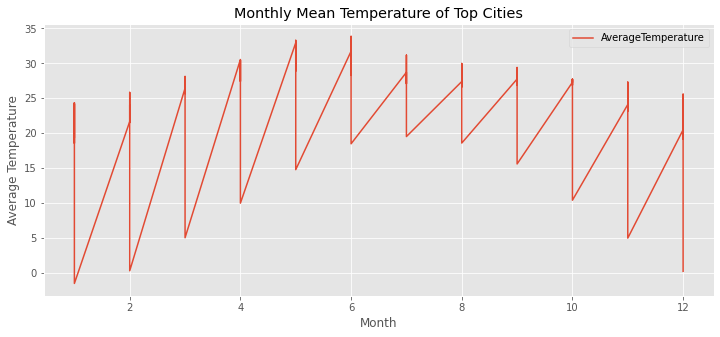

In [25]:
top_cities.plot(figsize =(12,5))
plt.title('Monthly Mean Temperature of Top Cities')
plt.ylabel("Average Temperature")
plt.grid(True)

Data Aggregated per Year

Mean temperatures in Indian cities by Year

In [26]:
India_mean_temperature_yearly = India.groupby([India.index.year.rename('Year'),India.City])['AverageTemperature'].mean().reset_index()
India_mean_temperature_yearly.head(10)

,Year,City,AverageTemperature
0,1796,Achalpur,25.608000
1,1796,Adilabad,26.951833
2,1796,Adoni,26.904417
3,1796,Agartala,24.787333
4,1796,Agra,25.050833
5,1796,Ahmadabad,26.350917
6,1796,Ahmadnagar,24.390583
7,1796,Aizawl,22.707583
8,1796,Ajmer,25.247917
9,1796,Akola,26.314167


Plotting the graph for top cities of India.

In [28]:
top_cities_yearly = India_mean_temperature_yearly[India_mean_temperature_yearly.City.isin(['Ahmadabad', 'Calcutta', 'Madras','New Delhi', 'Bombay', 'Srinagar'])]
top_cities_yearly = top_cities_yearly.set_index('Year')
top_cities_yearly.head()

,City,AverageTemperature
Year,,
1796,Ahmadabad,26.350917
1796,Bombay,26.397833
1796,Calcutta,25.886250
1796,Madras,27.991833
1796,New Delhi,25.030250


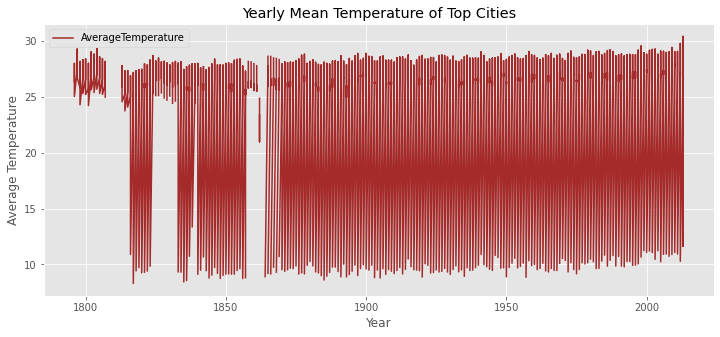

In [29]:
top_cities_yearly.plot(color = 'brown',figsize =(12,5))
plt.title('Yearly Mean Temperature of Top Cities')
plt.ylabel("Average Temperature")
plt.grid(True)


Handling missing data. 

In [30]:
top_cities_yearly = top_cities_yearly.fillna(top_cities_yearly.mean())
top_cities_yearly.tail()

,City,AverageTemperature
Year,,
2013,Bombay,26.71300
2013,Calcutta,27.36925
2013,Madras,30.41175
2013,New Delhi,26.70925
2013,Srinagar,11.63975


country=country.set_index('dt')
country.index=pd.to_datetime(country.index)
country.head()

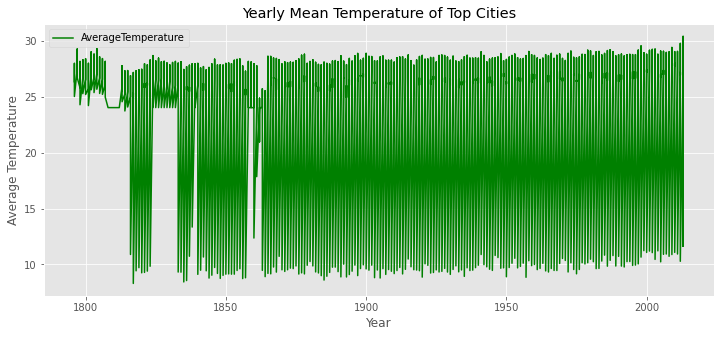

In [31]:
top_cities_yearly.plot(color = 'green',figsize =(12,5))
plt.title('Yearly Mean Temperature of Top Cities')
plt.ylabel("Average Temperature")
plt.grid(True)

Trend in Global Temperature

In [32]:
global_temp = global_temp.set_index('dt')
global_temp.index = pd.to_datetime(global_temp.index)
global_temp = global_temp.resample('A').mean()
global_temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-12-31,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN
1751-12-31,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN
1752-12-31,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN
1753-12-31,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN
1754-12-31,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN


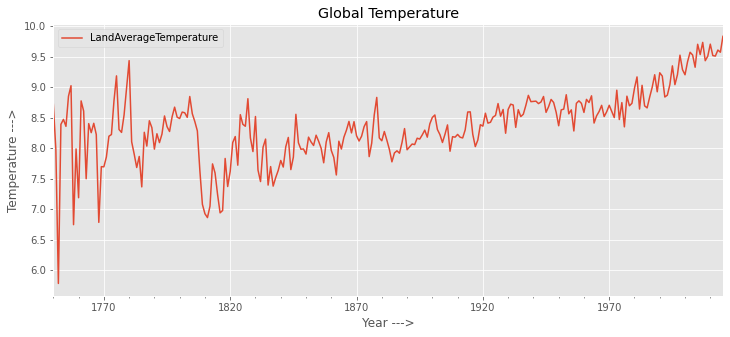

In [33]:
x = global_temp.loc[:,['LandAverageTemperature']]
x.plot(figsize =(12,5))
plt.title('Global Temperature')
plt.xlabel("Year --->")
plt.ylabel("Temperature --->")
plt.grid(True)

The global mean temperature graph is definitely showing an upward trend. We can use the data frame country to further evaluate whether the upward trend is uniform or contributed by some selected countries.

Countries with Minimum and Maximum temperature difference over years

In [34]:
country=country.set_index('dt')
country.index=pd.to_datetime(country.index)
country.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


In [35]:
country_diff=country.groupby([country.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
country_diff.head()

,Year,Country,AverageTemperature
0,1743,Albania,8.620
1,1743,Andorra,7.556
2,1743,Austria,2.482
3,1743,Belarus,0.767
4,1743,Belgium,7.106


In [36]:
country_diff=country_diff.groupby(['Country']).AverageTemperature.agg(['max','min']).reset_index()
country_diff['diff']=country_diff['max']-country_diff['min']
country_diff.head()

,Country,max,min,diff
0,Afghanistan,18.379571,12.547167,5.832405
1,Africa,25.472500,23.036000,2.436500
2,Albania,14.993875,5.588250,9.405625
3,Algeria,25.215667,10.343000,14.872667
4,American Samoa,27.537917,25.667167,1.870750


Plotting the AverageTemperature for top 10 countries with the highest temperature difference:In&nbsp;[27]:

In [37]:
country_list_max = country_diff.nlargest(10, columns = 'diff')
country_list_max

,Country,max,min,diff
39,Canada,0.792714,-22.616000,23.408714
180,Russia,-1.628333,-21.342000,19.713667
115,Kazakhstan,8.937250,-8.789000,17.726250
159,North America,6.436000,-11.192667,17.628667
119,Kuwait,27.638667,12.020000,15.618667
234,Uzbekistan,16.188250,0.848000,15.340250
232,United States,12.231000,-2.774667,15.005667
225,Turkmenistan,18.613500,3.693000,14.920500
3,Algeria,25.215667,10.343000,14.872667
114,Jordan,22.228000,7.854500,14.373500


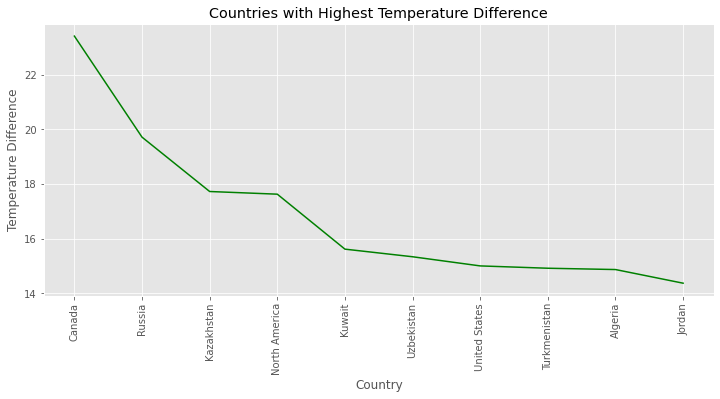

In [38]:
plt.figure(figsize=(12,5))
plt.title('Countries with Highest Temperature Difference')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Temperature Difference')
plt.plot(country_list_max['Country'],country_list_max['diff'],color='g')
plt.grid(True)

Plotting the AverageTemperature for top 10 countries with the lowest temperature difference:&nbsp;In&nbsp;[29]:

In [39]:
country_list_min = country_diff.nsmallest(10, columns = 'diff')
country_list_min

,Country,max,min,diff
91,Guam,27.778417,26.144083,1.634333
161,Northern Mariana Islands,27.778417,26.144083,1.634333
166,Palau,28.006417,26.262667,1.743750
170,Papua New Guinea,25.419750,23.608917,1.810833
201,Somalia,27.975625,26.159083,1.816542
200,Solomon Islands,27.586250,25.755417,1.830833
203,South America,22.857000,21.024917,1.832083
188,Samoa,27.236667,25.388000,1.848667
4,American Samoa,27.537917,25.667167,1.870750
73,Federated States Of Micronesia,27.997250,26.121250,1.876000


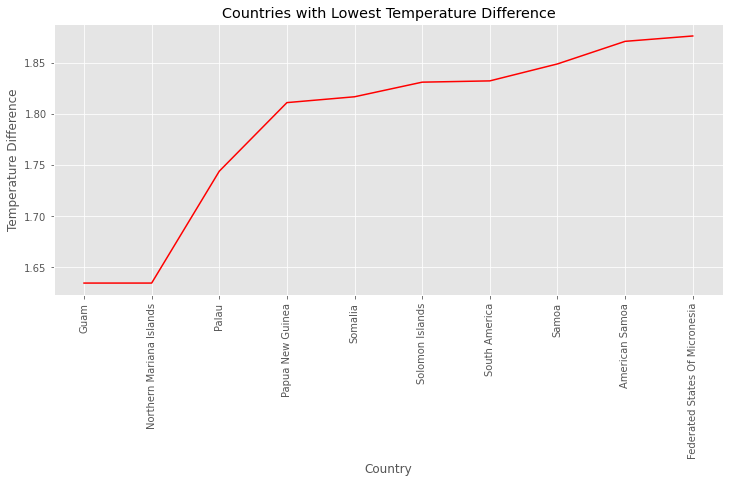

In [40]:
plt.figure(figsize=(12,5))
plt.title('Countries with Lowest Temperature Difference')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Temperature Difference')
plt.plot(country_list_min['Country'],country_list_min['diff'],color='r')
plt.grid(True)

The increase in temperature is not very evident in both the plots. Also the data doesn't seem to be very reliable. So repeating the exercise by first filtering the dataframe country to only represent data after 1900.

Plotting the averageTemperature for countries with the highest temperature difference.&nbsp;

In [41]:
country_filtered=country.groupby([country.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
country_filtered=country_filtered[country_filtered['Year']>=1900]
country_filtered=country_filtered.groupby(['Country']).AverageTemperature.agg(['max','min']).reset_index()
country_filtered['diff']=country_filtered['max']-country_filtered['min']
country_filtered.head()

,Country,max,min,diff
0,Afghanistan,16.533625,12.547167,3.986458
1,Africa,25.472500,23.330083,2.142417
2,Albania,14.993875,11.582500,3.411375
3,Algeria,25.215667,22.171583,3.044083
4,American Samoa,27.537917,25.853500,1.684417


In [42]:
country_list_max = country_filtered.nlargest(10, columns = 'diff')
country_list_max

,Country,max,min,diff
210,Svalbard And Jan Mayen,-3.781000,-9.682667,5.901667
234,Uzbekistan,16.188250,10.626417,5.561833
225,Turkmenistan,18.613500,13.112583,5.500917
115,Kazakhstan,8.937250,3.723750,5.213500
39,Canada,-1.640667,-6.802917,5.162250
228,Ukraine,10.913500,5.811167,5.102333
88,Greenland,-15.409750,-20.446833,5.037083
75,Finland,4.064125,-0.962417,5.026542
58,Denmark,-14.927250,-19.857750,4.930500
144,Mongolia,2.807750,-2.023000,4.830750


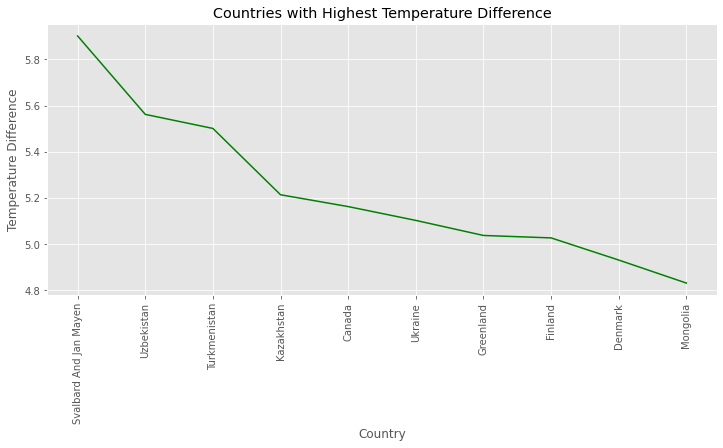

In [43]:
plt.figure(figsize=(12,5))
plt.title('Countries with Highest Temperature Difference')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Temperature Difference')
plt.plot(country_list_max['Country'],country_list_max['diff'],color='g')
plt.grid(True)

Plotting the averageTemperature for countries with the lowest temperature difference.&nbsp;

In [44]:
country_list_min = country_filtered.nsmallest(10, columns = 'diff')
country_list_min

,Country,max,min,diff
44,Chile,10.337000,8.869750,1.467250
207,Sri Lanka,28.175125,26.590000,1.585125
166,Palau,28.006417,26.391333,1.615083
91,Guam,27.778417,26.144083,1.634333
161,Northern Mariana Islands,27.778417,26.144083,1.634333
188,Samoa,27.236667,25.593583,1.643083
4,American Samoa,27.537917,25.853500,1.684417
178,Reunion,24.380500,22.660833,1.719667
104,Indonesia,26.754750,25.029333,1.725417
201,Somalia,27.975625,26.234250,1.741375


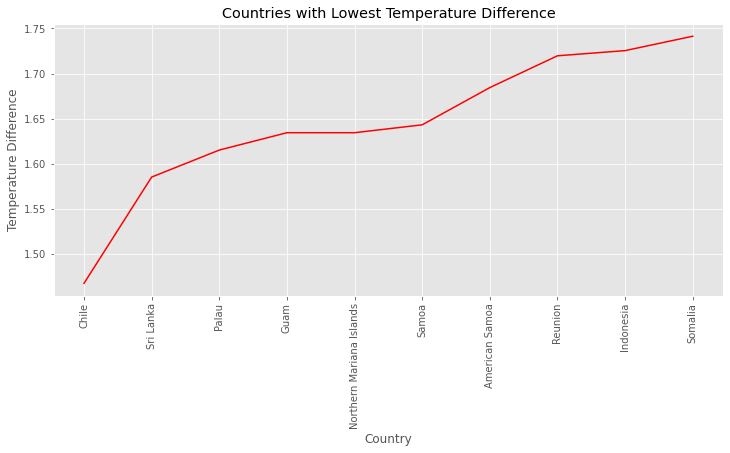

In [45]:
plt.figure(figsize=(12,5))
plt.title('Countries with Lowest Temperature Difference')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Temperature Difference')
plt.plot(country_list_min['Country'],country_list_min['diff'],color='r')
plt.grid(True)

The countries on Nothern and southern hemispheres seems to have witnessed significantly more global warming compared to the tropical countries.

Temperature Comparison of Developed Vs. Developing nations:

In [46]:
developed = ['United States', 'United Kingdom', 'France', 'Germany', 'Japan', 'Canada', 'Switzerland', 'Norway', 'Sweden', 'South Korea', 'Australia']
developed_df=country[country.Country.isin(developed)]
developed_df=developed_df.groupby([developed_df.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
developed_df.head()

,Year,Country,AverageTemperature
0,1743,France,10.203
1,1743,Germany,5.468
2,1743,Norway,-3.503
3,1743,Sweden,-1.444
4,1743,Switzerland,3.572


In [47]:
developing = ['China', 'India', 'Columbia', 'Brazil', 'Mexico', 'Indonesia', 'Philippines', 'Maldives', 'Turkey', 'South Africa', 'Libya']
developing_df=country[country.Country.isin(developing)]
developing_df=developing_df.groupby([developing_df.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
developing_df.head()

,Year,Country,AverageTemperature
0,1777,Turkey,12.688500
1,1778,Turkey,11.931250
2,1779,Turkey,12.031333
3,1780,Turkey,12.248333
4,1781,Turkey,11.669083


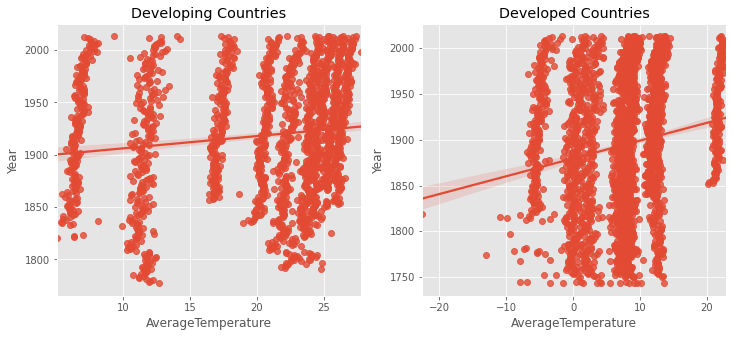

In [48]:
fig, axs = plt.subplots(ncols=2,figsize=(12,5))
sns.regplot(x='AverageTemperature',y='Year',fit_reg=True,data=developing_df, ax=axs[0])
axs[0].set(title = 'Developing Countries')
sns.regplot(x='AverageTemperature',y='Year',fit_reg=True,data=developed_df, ax=axs[1])
axs[1].set(title ='Developed Countries');

Predicting temperature using Linear regression for Developing Countries

In [49]:
developing_df = developing_df[developing_df['Year'] > 1900]

X = developing_df['Year'].values.reshape(-1,1)
Y = developing_df['AverageTemperature']
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#fit the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predict the test set results
y_pred_1 = regressor.predict(X_test)
y_pred_1

array([19.77962655, 19.60692046, 20.4795407 , 20.51589988, 20.42500194,
       19.53420211, 19.77053676, 20.26138564, 19.56147149, 20.02505099,
       20.06141017, 20.39773255, 19.57965108, 19.61601026, 20.4795407 ,
       19.91597346, 20.27956523, 19.63418985, 19.65236943, 20.16139791,
       20.46136111, 20.55225905, 20.20684688, 19.77962655, 20.00687141,
       19.98869182, 20.05232038, 19.60692046, 20.37955296, 20.34319379,
       20.3250142 , 19.5432919 , 20.51589988, 19.97960202, 20.1704877 ,
       20.36137338, 20.25229585, 20.1704877 , 20.09776935, 19.73417758,
       19.56147149, 20.1704877 , 19.58874087, 19.88870408, 19.67054902,
       20.03414079, 19.94324285, 20.46136111, 19.79780614, 19.93415305,
       20.1704877 , 19.84325511, 20.46136111, 20.55225905, 20.37046317,
       20.35228358, 19.78871635, 20.31592441, 20.47045091, 20.11594893,
       19.8523449 , 20.30683461, 19.64327964, 19.83416532, 20.49772029,
       19.80689593, 19.82507552, 19.62510005, 19.8523449 , 20.04

In [50]:
#coefficient and intercept for developing_df
regressor.coef_, regressor.intercept_

(array([0.00908979]), 2.254503444445426)

Predicting the temperatures in developing countries in the year 2025.

In [51]:
regressor.predict([[2025]])

array([20.66133658])

### Predicting temperature using Linear regression for Developed Countries

In [52]:
developed_df = developed_df[developed_df['Year'] > 1900]

X = developed_df['Year'].values.reshape(-1,1)
Y = developed_df['AverageTemperature']
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#fit the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predict the test set results
y_pred_2 = regressor.predict(X_test)
y_pred_2

array([9.25956093, 7.83009313, 7.90085886, 8.84911968, 7.68856166,
       9.14633575, 9.07557002, 8.24053438, 8.26884067, 8.62266933,
       8.86327282, 8.82081338, 7.7310211 , 7.67440852, 8.07069662,
       8.21222808, 8.60851619, 8.07069662, 8.3679127 , 7.91501201,
       8.29714696, 8.45283158, 8.12730921, 8.60851619, 8.46698472,
       8.46698472, 7.90085886, 9.08972317, 8.73589451, 7.84424628,
       9.21710149, 8.08484977, 8.14146235, 9.08972317, 7.74517425,
       8.99065114, 8.41037214, 8.84911968, 7.98577774, 8.25468752,
       8.56605675, 9.04726373, 8.7642008 , 7.67440852, 8.16976865,
       9.25956093, 8.82081338, 7.77348054, 8.69343507, 8.22638123,
       7.7310211 , 8.52359731, 8.5519036 , 9.24540778, 8.42452528,
       7.71686796, 8.18392179, 8.50944416, 9.23125463, 8.75004765,
       8.22638123, 9.06141688, 8.83496653, 8.976498  , 8.24053438,
       9.14633575, 8.976498  , 7.85839942, 8.19807494, 8.05654347,
       7.68856166, 9.00480429, 8.99065114, 9.14633575, 8.62266

In [53]:
#coefficient and intercept for developed_df
regressor.coef_, regressor.intercept_

(array([0.01415315]), -19.230722998457054)

Predicting the temperatures in developed countries in the year 2025.In&nbsp;[44]:

In [54]:
regressor.predict([[2025]])

array([9.42939868])

In [55]:
# Plotly
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots

In [56]:
data = pd.read_csv('/work/GlobalLandTemp/continents2.csv')

In [57]:
city['Date'] = pd.to_datetime(city['dt'])
city['year'] = city['Date'].dt.year

by_year = city.groupby(by = ['year', 'City', 'Country', 'Latitude', 'Longitude']).mean().reset_index()

In [58]:
continent_map = pd.read_csv("/work/GlobalLandTemp/continents2.csv")
continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]

# Add information
data = pd.merge(left = by_year, right = continent_map, on = 'Country', how = 'left')

In [59]:
map_countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year','alpha-3']).mean().reset_index()

# Min temperature is -5.453083, and because the size in a map cannot be negative, we will add 6.5 to all temperatures
# to "standardize the data"
map_countries['AverageTemperature'] = map_countries['AverageTemperature'] + 6.5

fig = px.scatter_geo(map_countries, locations='alpha-3', color='region', color_discrete_sequence = ('rgb(128,0,0)','rgb(210,105,30)','rgb(135,206,235)','rgb(107,142,35)'), hover_name="Country", size="AverageTemperature", size_max=15, opacity = 0.8, animation_frame="year", projection="natural earth", title='Interactive Globe Map - Temperature increase')
fig.show()

In [60]:

mean = map_countries.groupby(['region','Country','alpha-3'])['AverageTemperature'].mean().reset_index()
maximum = map_countries.groupby(['region','Country','alpha-3'])['AverageTemperature'].max().reset_index()
difference = pd.merge(left = mean, right = maximum, on = ['region','Country','alpha-3'])
difference['diff'] = difference['AverageTemperature_y'] - difference['AverageTemperature_x']
difference.rename(columns = {'AverageTemperature_y':'Maximum Average Temperature',
                             'AverageTemperature_y':'Overall Avg Temp'}, inplace = True)

# Figure
fig = px.scatter_geo(difference, locations="alpha-3", color="Overall Avg Temp", 
                     hover_name="Country", size="diff", size_max=15, 
                     projection="natural earth", opacity = 0.8,
                     color_continuous_scale=('#283747', '#2874A6', '#3498DB', '#F5B041', '#E67E22', '#A93226'),
                     title = 'Global Map - difference between the mean and max temperatures')
fig.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=da57aaaf-2739-4452-8d83-330d0ac6bd62' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>